In [287]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

In [7]:
ratings = pd.read_csv("C:/Users/PCS/Desktop/Dataset/ratings.tsv", sep="\t")
print(ratings.head())

      tconst  averageRating  numVotes
0  tt0000001            5.7      2097
1  tt0000002            5.6       282
2  tt0000003            6.5      2117
3  tt0000004            5.4       182
4  tt0000005            6.2      2847


In [9]:
top_ratings = ratings.sort_values(by="numVotes", ascending=False).head(1000)
print(top_ratings.head())

           tconst  averageRating  numVotes
84119   tt0111161            9.3   2959782
257445  tt0468569            9.0   2941366
673751  tt1375666            8.8   2610180
100945  tt0137523            8.8   2391839
448806  tt0944947            9.2   2361522


In [11]:
top_ratings.to_csv("C:/Users/PCS/Desktop/dsecodingproject_Chaima/Dataset/top_ratings.tsv", sep="\t", index=False)

In [15]:
movies = pd.read_csv("C:/Users/PCS/Desktop/Dataset/movie.tsv", sep="\t",usecols=['tconst', 'primaryTitle','startYear','runtimeMinutes', 'genres'])
print(movies.head())

      tconst            primaryTitle startYear runtimeMinutes  \
0  tt0000001              Carmencita      1894              1   
1  tt0000002  Le clown et ses chiens      1892              5   
2  tt0000003            Poor Pierrot      1892              5   
3  tt0000004             Un bon bock      1892             12   
4  tt0000005        Blacksmith Scene      1893              1   

                     genres  
0         Documentary,Short  
1           Animation,Short  
2  Animation,Comedy,Romance  
3           Animation,Short  
4              Comedy,Short  


In [17]:
top_movies = movies[movies['tconst'].isin(top_ratings['tconst'])]
print(top_movies.head())

          tconst        primaryTitle startYear runtimeMinutes  \
27477  tt0027977        Modern Times      1936             87   
30819  tt0031381  Gone with the Wind      1939            238   
31559  tt0032138    The Wizard of Oz      1939            102   
32864  tt0033467        Citizen Kane      1941            119   
33963  tt0034583          Casablanca      1942            102   

                         genres  
27477      Comedy,Drama,Romance  
30819         Drama,Romance,War  
31559  Adventure,Family,Fantasy  
32864             Drama,Mystery  
33963         Drama,Romance,War  


In [19]:
top_movies.to_csv("C:/Users/PCS/Desktop/dsecodingproject_Chaima/Dataset/top_movies.tsv", sep="\t", index=False)

In [21]:
crew = pd.read_csv("C:/Users/PCS/Desktop/Dataset/crew.tsv", sep="\t",usecols=['tconst', 'nconst', 'category','characters']) 
print(crew.head())

      tconst     nconst         category characters
0  tt0000001  nm1588970             self   ["Self"]
1  tt0000001  nm0005690         director         \N
2  tt0000001  nm0005690         producer         \N
3  tt0000001  nm0374658  cinematographer         \N
4  tt0000002  nm0721526         director         \N


In [22]:
top_crew = crew[crew['tconst'].isin(top_ratings['tconst'])]   
print(top_crew.head())  

           tconst     nconst category            characters
307109  tt0027977  nm0000122    actor  ["A Factory Worker"]
307110  tt0027977  nm0002104  actress           ["A Gamin"]
307111  tt0027977  nm0074788    actor   ["Cafe Proprietor"]
307112  tt0027977  nm0761866    actor          ["Big Bill"]
307113  tt0027977  nm0174682    actor          ["Mechanic"]


In [25]:
top_crew.to_csv("C:/Users/PCS/Desktop/dsecodingproject_Chaima/Dataset/top_crew.tsv", sep="\t", index=False)


In [27]:
person = pd.read_csv("C:/Users/PCS/Desktop/Dataset/person.tsv", sep="\t")
print(person.head())

      nconst      primaryName birthYear deathYear  \
0  nm0000001     Fred Astaire      1899      1987   
1  nm0000002    Lauren Bacall      1924      2014   
2  nm0000003  Brigitte Bardot      1934        \N   
3  nm0000004     John Belushi      1949      1982   
4  nm0000005   Ingmar Bergman      1918      2007   

                    primaryProfession                           knownForTitles  
0        actor,miscellaneous,producer  tt0050419,tt0072308,tt0053137,tt0027125  
1  actress,soundtrack,archive_footage  tt0037382,tt0075213,tt0117057,tt0038355  
2   actress,music_department,producer  tt0057345,tt0049189,tt0056404,tt0054452  
3       actor,writer,music_department  tt0072562,tt0077975,tt0080455,tt0078723  
4               writer,director,actor  tt0050986,tt0069467,tt0083922,tt0050976  


In [28]:
top_person = person[person['nconst'].isin(top_crew['nconst'])]
print(top_person.head())

       nconst      primaryName birthYear deathYear  \
5   nm0000006   Ingrid Bergman      1915      1982   
6   nm0000007  Humphrey Bogart      1899      1957   
7   nm0000008    Marlon Brando      1924      2004   
15  nm0000016  Georges Delerue      1925      1992   
19  nm0000020      Henry Fonda      1905      1982   

                  primaryProfession                           knownForTitles  
5       actress,producer,soundtrack  tt0034583,tt0036855,tt0038109,tt0038787  
6      actor,producer,miscellaneous  tt0034583,tt0043265,tt0037382,tt0042593  
7             actor,director,writer  tt0078788,tt0068646,tt0047296,tt0070849  
15  composer,music_department,actor  tt0091763,tt0096320,tt0069946,tt0080610  
19     actor,producer,miscellaneous  tt0050083,tt0082846,tt0032551,tt0051207  


In [31]:
top_person.to_csv("C:/Users/PCS/Desktop/dsecodingproject_Chaima/Dataset/top_person.tsv", sep="\t", index=False)


In [117]:
points = 0

In [119]:
#choosing difficulty level function
def choose_difficulty():
    global points_multiplier
    print("Choose your quiz difficulty level:")
    print("1. Easy (1 point per correct answer)")
    print("2. Medium (2 points per correct answer)")
    print("3. Hard (3 points per correct answer)")
    
   
    difficulty = input("Enter the number for your choice: ")
   
    return difficulty


In [359]:
def easylevel(top_movies):
    """
    The easy level questions function
    """
    global points
    correct_answers = 0
    wrong_answers = 0
    
    movies = top_movies

    if 'startYear' not in movies.columns:
        print("'startYear' column is missing in the dataset.")
        return
    movies = movies[movies['startYear'].notna()]  # Remove rows with missing 'startYear'

    movies = movies[~movies['primaryTitle'].str.contains('episode', case=False, na=False)]

    if movies.empty:
        print("No movies with valid release years are available.")
        return

    # 1st Question: Release Year
    random_movie = movies.sample(1).iloc[0]
    movie_title = random_movie['primaryTitle']
    correct_year = int(random_movie['startYear'])



    options = list({correct_year, correct_year + 3, correct_year - 2, correct_year + 1})
    random.shuffle(options)

    print(f"\nQuestion 1: In which year was the movie '{movie_title}' released?")
    for i, option in enumerate(options, 1):
        print(f"{i}. {option}")

            # Giving a hint to the user ( by distributong the release years for the movies and plotting a line near the correct year)
    print("*HINT*")
    plt.figure(figsize=(10, 6))
    plt.hist(movies['startYear'].astype(int), bins=20, color='orange', edgecolor='darkgrey')
    plt.axvline(correct_year, color='darkblue', linestyle='--', label="Hint: Focus on this region")
    plt.title("Distribution of Movie Release Years",fontsize=13, color='darkblue')
    plt.xlabel("Year",fontsize=9, color='darkblue')
    plt.ylabel("Number of Movies",fontsize=9, color='darkblue')
    plt.legend()
    plt.show()

    try:
        user_answer = int(input("Your answer (1-4): "))
        if options[user_answer - 1] == correct_year:
            print("Correct! 🎉")
            correct_answers += 1
            points += 10  # Add 10 points for the correct answer
        else:
            print(f"Wrong! The correct answer is {correct_year}.")
            wrong_answers += 1
    except (ValueError, IndexError):
        print("Invalid input. Please choose a number between 1 and 4.")
        wrong_answers += 1



    
    # 2nd Question: Genre
    correct_genre = random_movie['genres'].split(',')[0]  # Getting only the first genre in order to know which one is the correct later
    
    # Generate random genres for the options
    all_genres = movies['genres'].dropna().unique()
    random_genres = random.sample(all_genres.tolist(), 3)
    random_genres.append(correct_genre) 
    random.shuffle(random_genres)

    print(f"\nQuestion 2: What is the genre of the movie '{movie_title}'?")
    for i, genre in enumerate(random_genres, 1):
        print(f"{i}. {genre}")

    try:
        user_answer = int(input("Your answer (1-4): "))
        if random_genres[user_answer - 1] == correct_genre:
            print("Correct! 🎉")
            correct_answers += 1
            points += 10  # Adding 10 points for the correct answer
        else:
            print(f"Wrong! The correct answer is {correct_genre}.")
            wrong_answers += 1
    except (ValueError, IndexError):
        print("Invalid input. Please choose a number between 1 and 4.")
        wrong_answers += 1

    # 3rd Question: Runtime
    correct_runtime = int(random_movie['runtimeMinutes'])
    options_runtime = list({correct_runtime, correct_runtime + 15, correct_runtime + 10, correct_runtime + 5})
    random.shuffle(options_runtime)

    print(f"\nQuestion 3: How many minutes is the runtime of the movie '{movie_title}'?")
    for i, option in enumerate(options_runtime, 1):
        print(f"{i}. {option}")

    try:
        user_answer = int(input("Your answer (1-4): "))
        if options_runtime[user_answer - 1] == correct_runtime:
            print("Correct! 🎉")
            correct_answers += 1
            points += 10
        else:
            wrong_answers += 1
            print(f"Wrong! The correct answer is {correct_runtime} minutes.")
    except (ValueError, IndexError):
        print("Invalid input. Please choose a number between 1 and 4.")
        wrong_answers += 1

     # Answers summary pie chart
    labels = ['Correct Answers', 'Wrong Answers']
    sizes = [correct_answers, wrong_answers]
    colors = ['#4CAF50', '#F44336']
    explode = (0.1, 0)  # Explode the first slice

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title("Quiz Results")
    plt.show()

    print(f"\nFinal Results: Correct Answers: {correct_answers}, Wrong Answers: {wrong_answers}")


In [361]:
def mediumlevel(top_movies, top_crew, top_person):
    """
    Medium level questions function 
    """
    global points
    correct_answers = 0
    wrong_answers = 0


    movies = top_movies
    crew = top_crew
    persons = top_person

    # Ensure 'startYear' exists and filter invalid rows
    if 'startYear' not in movies.columns:
        print("'startYear' column is missing in the dataset.")
        return
    movies = movies[movies['startYear'].notna()]  # Remove rows with missing 'startYear'
    movies = movies[~movies['primaryTitle'].str.contains('episode', case=False, na=False)]  # Remove episodes

    if movies.empty:
        print("No movies with valid release years are available.")
        return

    # Randomly select a movie
    random_movie = movies.sample(1).iloc[0]
    movie_title = random_movie['primaryTitle']
    correct_year = int(random_movie['startYear'])

    # Generate options for the year question
    options = list({correct_year, correct_year + 3, correct_year - 2, correct_year + 1})
    random.shuffle(options)

    # 1st Question: release year
    print(f"\nMedium Level Question 1: In which year was the movie '{movie_title}' released?")
    for i, option in enumerate(options, 1):
        print(f"{i}. {option}")

    # Generating some histogram data related to decades of release years (hint for the user)
    # Replace non-numeric values with NaN and drop them
    movies['startYear'] = movies['startYear'].replace('\\N', np.nan)
    movies['startYear'] = pd.to_numeric(movies['startYear'], errors='coerce')
    
    # Drop rows with NaN values in 'startYear'
    movies_cleaned = movies.dropna(subset=['startYear'])
    years = movies_cleaned['startYear'].astype(int).to_numpy()

    bins = np.arange(1900, 2030, 10)
    histogram, bin_edges = np.histogram(years, bins)
    
    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.bar(bin_edges[:-1], histogram, width=8, color='orange', edgecolor='black')
    plt.title("Distribution of Movie Release Years (per Decades)",fontsize=13, color='darkblue')
    plt.xlabel("Decade",fontsize=9, color='darkblue')
    plt.ylabel("Number of Movies",fontsize=9, color='darkblue')
    plt.xticks(bin_edges, rotation=45)
    plt.show()

    try:
        user_answer = int(input("Your answer (1-4): "))
        if options[user_answer - 1] == correct_year:
            print("Correct! 🎉")
            correct_answers += 1
            points += 20  # Points for correct answer
        else:
            print(f"Wrong! The correct answer is {correct_year}.")
            wrong_answers += 1
    except (ValueError, IndexError):
        print("Invalid input. Please choose a number between 1 and 4.")
        wrong_answers += 1

    # 2nd question:  Crew Question 
    # Randomly select a crew member related to the selected movie
    movie_crew = crew[crew['tconst'] == random_movie['tconst']]
    if movie_crew.empty:
        print("No crew data available for this movie.")
    else:
        # Randomly select one crew member
        random_crew = movie_crew.sample(1).iloc[0]
        crew_member_name = random_crew['nconst']
        crew_member_role = random_crew['category']  # This could be director, writer, etc.

        # Retrieve the person's name from the person dataset
        crew_member_info = persons[persons['nconst'] == crew_member_name]
        crew_member_name_full = crew_member_info['primaryName'].iloc[0] if not crew_member_info.empty else "Unknown"

        # Ask the user to identify the crew member
        print(f"\nMedium Level Question 2: Which one is a(n) {crew_member_role} of the movie '{movie_title}'?")
        
        # Generate random incorrect options
        random_names = random.sample(list(persons['primaryName']), 3)
        options = [crew_member_name_full] + random_names
        random.shuffle(options)
        
        print("Options: ")
        for i, option in enumerate(options, 1):
            print(f"{i}. {option}")

        try:
            user_answer = int(input("Your answer (1-4): "))
            if options[user_answer - 1] == crew_member_name_full:
                print("Correct! 🎉")
                correct_answers += 1
                points += 20  
            else:
                print(f"Wrong! The correct answer is {crew_member_name_full}.")
                wrong_answers += 1
        except (ValueError, IndexError):
            print("Invalid input. Please choose a number between 1 and 4.")
            wrong_answers += 1
            
    # 3rd Question: Producer Question 
    # Randomly select a producer (crew member with role "producer")
    movie_producers = movie_crew[movie_crew['category'] == 'producer']
    if movie_producers.empty:
        print("No producers data available for this movie.")
    else:
        # Randomly select one producer
        random_producer = movie_producers.sample(1).iloc[0]
        producer_name = random_producer['nconst']

  
        producer_info = persons[persons['nconst'] == producer_name]
        producer_name_full = producer_info['primaryName'].iloc[0] if not producer_info.empty else "Unknown"

        print(f"\nMedium Level Question 3: Who is the producer of the movie '{movie_title}'?")
        
        # Generate random incorrect options
        random_names = random.sample(list(persons['primaryName']), 3)
        options = [producer_name_full] + random_names
        random.shuffle(options)
        
        print("Options: ")
        for i, option in enumerate(options, 1):
            print(f"{i}. {option}")

        try:
            user_answer = int(input("Your answer (1-4): "))
            if options[user_answer - 1] == producer_name_full:
                print("Correct! 🎉")
                correct_answers += 1
                points += 20  # Points for correct answer
            else:
                print(f"Wrong! The correct answer is {producer_name_full}.")
                wrong_answers += 1
        except (ValueError, IndexError):
            print("Invalid input. Please choose a number between 1 and 4.")
            wrong_answers += 1

      # Answers summary pie chart
    labels = ['Correct Answers', 'Wrong Answers']
    sizes = [correct_answers, wrong_answers]
    colors = ['#4CAF50', '#F44336']
    explode = (0.1, 0)  # Explode the first slice

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title("Quiz Results")
    plt.show()

    print(f"\nFinal Results: Correct Answers: {correct_answers}, Wrong Answers: {wrong_answers}")


In [349]:

def hardlevel(top_movies, top_crew, top_person):
    """
    Hard level questions function
    """
    global points
    correct_answers = 0
    wrong_answers = 0


    movies = top_movies
    crew = top_crew
    persons = top_person

    top_crew = top_crew[top_crew['characters'].notna()]
    top_person = top_person[top_person['birthYear'].notna()]
    # 1st Question: Release Year of the movie
    random_movie = movies.sample(1).iloc[0]
    movie_title = random_movie['primaryTitle']
    correct_year = int(random_movie['startYear'])
    
    options = list({correct_year, correct_year + 3, correct_year - 2, correct_year + 1})
    random.shuffle(options)

    print(f"\nQuestion 1: In which year was the movie '{movie_title}' released?")
    for i, option in enumerate(options, 1):
        print(f"{i}. {option}")

    try:
        user_answer = int(input("Your answer (1-4): "))
        if options[user_answer - 1] == correct_year:
            print("Correct! 🎉")
            points += 25  # Adding 25 points for correct answer
            correct_answers += 1
        else:
            print(f"Wrong! The correct answer is {correct_year}.")
            wrong_answers += 1
    except (ValueError, IndexError):
        print("Invalid input. Please choose a number between 1 and 4.")
        wrong_answers += 1

    # 2nd question : Character played?
    # Get actors/actresses and their characters for the movie
    movie_crew = crew[crew['tconst'] == random_movie['tconst']]
    actors = movie_crew[movie_crew['category'] == 'actor']

    if actors.empty:
        print("No actors found for this movie.")
        return

    # Randomly choose an actor
    random_actor = actors.sample(1).iloc[0]
    actor_nconst = random_actor['nconst']

    # Get actor's name from the top_person table
    actor_name = persons[persons['nconst'] == actor_nconst]['primaryName'].values[0]

    # Get the character played by the actor
    correct_character = random_actor['characters']
    clean_correct_character = correct_character.strip("[]").strip('"') #the character data is with [""] so we want to display only the character name

    # If there is no character name, skip the question
    if pd.isna(correct_character):
        print(f"No character name found for {actor_name} in the movie '{movie_title}'.")
        return

    # Generate random incorrect character names
    random_characters = random.sample(list(crew['characters'].dropna().unique()), 3)
    clean_random_characters = [char.strip("[]").strip('"') for char in random_characters]
    options = [clean_correct_character] + clean_random_characters
    random.shuffle(options)

    # Ask the question
    print(f"\nQuestion 2: Which character did {actor_name} play in the movie '{movie_title}'?")
    for i, option in enumerate(options, 1):
        print(f"{i}. {option}")

    try:
        user_answer = int(input("Your answer (1-4): "))
        if options[user_answer - 1] == clean_correct_character:
            print("Correct! 🎉")
            correct_answers += 1
            points += 25  # Adding 25 points for correct answer
        else:
            print(f"Wrong! The correct answer is {clean_correct_character}.")
            wrong_answers += 1
    except (ValueError, IndexError):
        print("Invalid input. Please choose a number between 1 and 4.")
        wrong_answers += 1

   
    #3rd Question: Actor's birth year
    correct_birth_year = int(persons[persons['nconst'] == actor_nconst]['birthYear'].values[0])

    options = list({correct_birth_year, correct_birth_year + 5, correct_birth_year - 3, correct_birth_year + 10})
    random.shuffle(options)

    print(f"\nQuestion 3: What is the birth year of {actor_name}?")
    for i, option in enumerate(options, 1):
        print(f"{i}. {option}")
  
    

    try:
        user_answer = int(input("Your answer (1-4): "))
        if options[user_answer - 1] == correct_birth_year:
            print("Correct! 🎉")
            correct_answers += 1
            points += 25
        else:
            print(f"Wrong! The correct answer is {correct_birth_year}.")
            wrong_answers += 1
    except (ValueError, IndexError):
        print("Invalid input. Please choose a number between 1 and 4.")
        wrong_answers += 1  
        
    # Answers summary pie chart
    labels = ['Correct Answers', 'Wrong Answers']
    sizes = [correct_answers, wrong_answers]
    colors = ['#4CAF50', '#F44336']
    explode = (0.1, 0)  # Explode the first slice

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title("Quiz Results")
    plt.show()

    print(f"\nFinal Results: Correct Answers: {correct_answers}, Wrong Answers: {wrong_answers}")
    



Choose your quiz difficulty level:
1. Easy (1 point per correct answer)
2. Medium (2 points per correct answer)
3. Hard (3 points per correct answer)


Enter the number for your choice:  1



Question 1: In which year was the movie 'Magnolia' released?
1. 2000
2. 1999
3. 1997
4. 2002
*HINT*


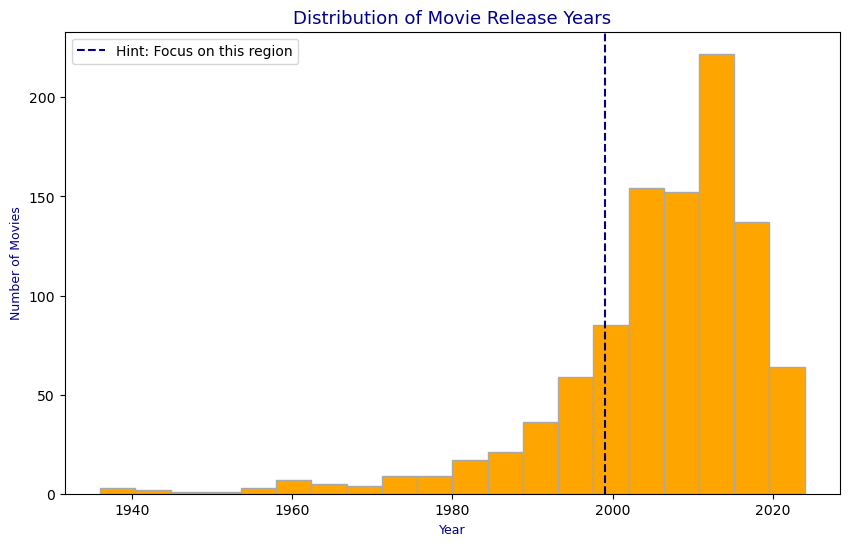

Your answer (1-4):  2


Correct! 🎉

Question 2: What is the genre of the movie 'Magnolia'?
1. Crime,Drama
2. Action,Drama,Sport
3. Drama
4. Biography,Drama,Sport


Your answer (1-4):  3


Correct! 🎉

Question 3: How many minutes is the runtime of the movie 'Magnolia'?
1. 193
2. 188
3. 203
4. 198


Your answer (1-4):  3


Wrong! The correct answer is 188 minutes.


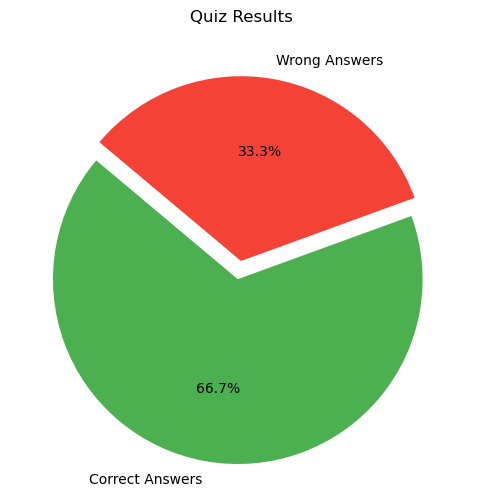


Final Results: Correct Answers: 2, Wrong Answers: 1
Your final score is: 20 Points


In [365]:
if __name__ == "__main__":


    # Choose difficulty level at the start (by calling the choose_difficulty function defined at the beginning)
    difficulty_level = choose_difficulty()

    
    if difficulty_level == '1':  # Easy (calling the easy level function)
        easylevel(top_movies)
    elif difficulty_level == '2':  # Medium (calling the medium level function)
        mediumlevel(top_movies, top_crew, top_person)
    elif difficulty_level == '3':  # Hard (calling the hard level function)
        hardlevel(top_movies, top_crew, top_person)

    # Print final score
    
    print(f"Your final score is: {points} Points")
points=0